In [141]:
###### Credit Card Fraud Detection using CNN Project

In [111]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

1.14.0


In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [113]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [114]:
df.shape

(284807, 31)

In [115]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [117]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [118]:
### Balance Datasets

In [119]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

In [120]:
non_fraud.shape

(284315, 31)

In [121]:
fraud.shape

(492, 31)

In [122]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [123]:
df = fraud.append(non_fraud, ignore_index = True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
5,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
7,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
8,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
9,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [124]:
df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [125]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=0,stratify=y)

In [127]:
X_train.shape,X_test.shape

((787, 30), (197, 30))

In [128]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [129]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [130]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test  = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [131]:
X_train.shape,X_test.shape

((787, 30, 1), (197, 30, 1))

In [132]:
#### Build CNN

In [133]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation = 'relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation ='sigmoid'))

In [134]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_5 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)             

In [135]:
model.compile(optimizer=Adam(lr=0.0001),loss ='binary_crossentropy', metrics=['accuracy'])

In [136]:
history = model.fit(X_train,y_train, epochs=epochs, validation_data=(X_test,y_test), verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 8s 11ms/sample - loss: 1.0033 - acc: 0.6213 - val_loss: 0.6097 - val_acc: 0.7970
Epoch 2/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.5846 - acc: 0.7942 - val_loss: 0.5593 - val_acc: 0.8579
Epoch 3/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.4300 - acc: 0.8297 - val_loss: 0.5292 - val_acc: 0.8934
Epoch 4/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.4500 - acc: 0.8513 - val_loss: 0.4971 - val_acc: 0.8934
Epoch 5/20
787/787 [==============================] - 1s 997us/sample - loss: 0.4120 - acc: 0.8653 - val_loss: 0.4638 - val_acc: 0.8934
Epoch 6/20
787/787 [==============================] - 1s 970us/sample - loss: 0.3490 - acc: 0.8920 - val_loss: 0.4272 - val_acc: 0.8985
Epoch 7/20
787/787 [==============================] - 1s 997us/sample - loss: 0.2755 - acc: 0.8933 - val_loss: 0.4035 - val_acc: 0.9086
Epoch 8/2

In [137]:
def plot_learningCurve(history, epoch):
    #plot training & val iddation accuracy values
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range, history.history['acc']) 
    plt.plot(epoch_range, history.history['val_acc'])
    plt.title("Model accuracy")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc ='upper left')
    plt.show()
    
    #plot training & val iddation loss values
    plt.plot(epoch_range, history.history['loss']) 
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model loss")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc ='upper left')
    plt.show()    

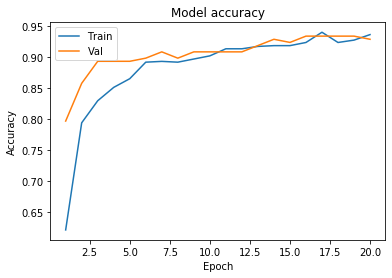

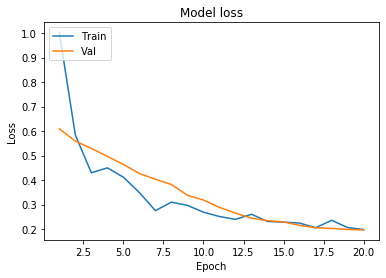

In [138]:
plot_learningCurve(history,epochs)

In [139]:
### Adding Max Pool

Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 15s 19ms/sample - loss: 0.9331 - acc: 0.5654 - val_loss: 0.6568 - val_acc: 0.7513
Epoch 2/20
787/787 [==============================] - 3s 3ms/sample - loss: 0.8186 - acc: 0.6277 - val_loss: 0.6415 - val_acc: 0.6701
Epoch 3/20
787/787 [==============================] - 2s 2ms/sample - loss: 0.6822 - acc: 0.6684 - val_loss: 0.6245 - val_acc: 0.6447
Epoch 4/20
787/787 [==============================] - 2s 3ms/sample - loss: 0.5769 - acc: 0.7294 - val_loss: 0.6022 - val_acc: 0.6650
Epoch 5/20
787/787 [==============================] - 3s 3ms/sample - loss: 0.5605 - acc: 0.7370 - val_loss: 0.5779 - val_acc: 0.6701
Epoch 6/20
787/787 [==============================] - 2s 2ms/sample - loss: 0.4769 - acc: 0.7980 - val_loss: 0.5553 - val_acc: 0.6751
Epoch 7/20
787/787 [==============================] - 3s 4ms/sample - loss: 0.4737 - acc: 0.8107 - val_loss: 0.5285 - val_acc: 0.7005
Epoch 8/20
787

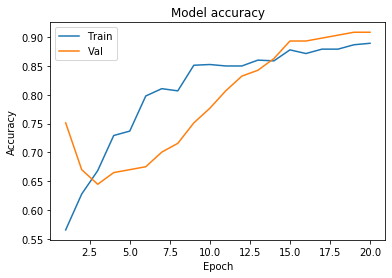

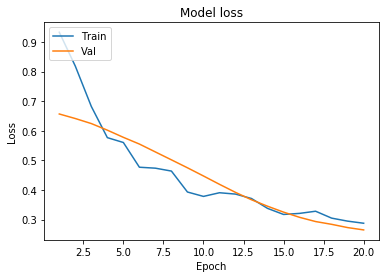

In [140]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation = 'relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001),loss ='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=epochs, validation_data=(X_test,y_test), verbose=1)
plot_learningCurve(history,epochs)